## Introduction

In recent years, the fitness industry has experienced significant growth, driven by an increasing global emphasis on health and wellness. With the proliferation of fitness centers, online workout platforms, and wearable fitness technology, more individuals are actively engaging in physical activities to improve their overall well-being. However, this surge in fitness participation has also led to a corresponding rise in exercise-related injuries, ranging from minor sprains to severe musculoskeletal issues. These injuries not only hinder progress towards fitness goals but also pose substantial challenges to individuals' physical and mental health.

Understanding the factors contributing to injury risk in the fitness domain is crucial for fostering a safe and sustainable exercise environment. While anecdotal evidence and isolated studies provide insights into specific aspects of injury prevention, there remains a notable gap in comprehensive research that integrates diverse datasets and employs advanced analytical techniques. Addressing this gap can yield deeper insights into the multifaceted nature of injury risks and support the development of targeted strategies to mitigate their impact.

This project aims to develop a predictive model that can assess the risk of exercise-related injuries based on various factors, including exercise habits, barriers, motivations, and demographic characteristics. By leveraging a combined dataset from a survey and an existing Kaggle dataset, I apply machine learning techniques to identify patterns and predictors of injury risk. The final model is integrated into an interactive dashboard, enabling users to input their exercise-related data and receive personalized injury risk assessments along with preventative measures.

Throughout this Jupyter Notebook, I will:
- Perform data preprocessing to clean and prepare the data for modeling.
- Conduct exploratory data analysis (EDA) to understand the characteristics and distribution of the data.
- Build and validate a predictive model using machine learning algorithms.
- Integrate the model (In a separate file: app.py) into an interactive dashboard for user-friendly injury risk assessment.
- Discuss the model's accuracy, results, and potential areas for improvement.

This research aims to enhance injury prevention efforts within the fitness community by providing data-driven insights and tools that empower individuals to make informed decisions about their exercise routines. Through this project, I hope to contribute to safer exercise practices and better overall health outcomes for fitness enthusiasts.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib

## Data Preprocessing

### Kaggle Dataset Analysis and Descriptive Statistics

In [3]:
# Load the Kaggle dataset
kaggle_df = pd.read_csv('fitness analysis.csv')


In [4]:
kaggle_df.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [5]:
kaggle_df.shape

(545, 18)

In [6]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 4   How impo

In [7]:
kaggle_df.describe()

,How important is exercise to you ?,How healthy do you consider yourself?
count,545.000000,545.000000
mean,3.884404,3.258716
std,0.997900,0.793495
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


In [8]:
# Remove the first column (Timestamp) as it is not needed
kaggle_df.drop(kaggle_df.columns[0], axis=1, inplace=True)

In [9]:
kaggle_df.head()

,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [10]:
# Rename columns
kaggle_df = kaggle_df.rename(columns={
    'Your name ': 'Your name',
    'Your age ': 'Your age',
    'Your gender ': 'Your gender',
    'How important is exercise to you ?': 'How important is exercising to you on a scale of 1 to 5',
    'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)': 'What barrier, if any, prevents you the most from exercising more regularly?',
    'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)': 'What form of exercises do you currently participate in the most?',
    'Do you exercise ___________ ?': 'How do you exercise most of the time?',
    'What time if the day do you prefer to exercise?': 'What time of the day do you prefer to exercise?',
    'How long do you spend exercising per day ?': 'How much time do you spend exercising per day?',
    'Would you say you eat a healthy balanced diet ?': 'Would you say, you are following a healthy balanced diet?',
    'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 'What prevents you the most from following a healthy balanced diet, if any?',
    'How healthy do you consider yourself?': 'How healthy do you consider yourself on a scale of 1 to 5?',
    'Have you ever recommended your friends to follow a fitness routine?': 'Have you recommended your friends to follow a fitness routine?',
    'Have you ever purchased a fitness equipment?': 'Have you ever purchased fitness equipment?',
    'What motivates you to exercise?         (Please select all that applies )': 'What motivates you the most to exercise?'
})

# Check the updated column names
print(kaggle_df.columns)


Index(['Your name', 'Your gender', 'Your age',
       'How important is exercising to you on a scale of 1 to 5',
       'How do you describe your current level of fitness ?',
       'How often do you exercise?',
       'What barrier, if any, prevents you the most from exercising more regularly?',
       'What form of exercises do you currently participate in the most?',
       'How do you exercise most of the time?',
       'What time of the day do you prefer to exercise?',
       'How much time do you spend exercising per day?',
       'Would you say, you are following a healthy balanced diet?',
       'What prevents you the most from following a healthy balanced diet, if any?',
       'How healthy do you consider yourself on a scale of 1 to 5?',
       'Have you recommended your friends to follow a fitness routine?',
       'Have you ever purchased fitness equipment?',
       'What motivates you the most to exercise?'],
      dtype='object')


In [11]:
kaggle_df.head()

,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?
0,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [12]:
# Add new columns with NaN values
kaggle_df['Injury risk'] = float('nan')  # Assign NaN to all rows in the 'injury_risk' column
kaggle_df['Injury type'] = float('nan')  # Assign NaN to all rows in the 'injury_type' column

# Display the updated DataFrame
kaggle_df.head()

,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,Injury risk,Injury type
0,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...,NaN,NaN
1,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...,NaN,NaN
2,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit,NaN,NaN
3,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight,NaN,NaN
4,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit,NaN,NaN


In [13]:
# Modify values in the specified column
kaggle_df['What barrier, if any, prevents you the most from exercising more regularly?'] = kaggle_df['What barrier, if any, prevents you the most from exercising more regularly?'].apply(lambda x: x.split(';')[0].strip())
kaggle_df['What form of exercises do you currently participate in the most?'] = kaggle_df['What form of exercises do you currently participate in the most?'].apply(lambda x: x.split(';')[0].strip())
kaggle_df['What prevents you the most from following a healthy balanced diet, if any?'] = kaggle_df['What prevents you the most from following a healthy balanced diet, if any?'].apply(lambda x: x.split(';')[0].strip())
kaggle_df['What motivates you the most to exercise?'] = kaggle_df['What motivates you the most to exercise?'].apply(lambda x: x.split(';')[0].strip())


In [14]:
kaggle_df.head()

,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,Injury risk,Injury type
0,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food,3,Yes,No,I'm sorry ... I'm not really interested in exe...,NaN,NaN
1,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time,Walking or jogging,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food,4,Yes,No,I want to be fit,NaN,NaN
2,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit,NaN,NaN
3,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit,NaN,NaN
4,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food,4,Yes,No,I want to be fit,NaN,NaN


In [15]:
# Find distinct values of the specified column
distinct_values = kaggle_df['What barrier, if any, prevents you the most from exercising more regularly?'].unique()

# Display distinct values
print("Distinct values of the column:")
for value in distinct_values:
    print(value)


Distinct values of the column:
I don't have enough time
I can't stay motivated
I exercise regularly with no barriers
I don't really enjoy exercising
I'll become too tired
I am lazy
I have an injury
I'm too lazy
Laziness
Lazy
I always busy with my regular works
My friends don't come
Travel time I skip


In [16]:
# Define replacement dictionary
replacement_dict = {
    "I'll become too tired": "I will become too tired",
    "I always busy with my regular works": "I don't have enough time",
    "Travel time I skip": "I don't have enough time",
    "I am lazy": "I can't stay motivated",
    "I'm too lazy": "I can't stay motivated",
    "Laziness": "I can't stay motivated",
    "Lazy": "I can't stay motivated",
    "My friends don't come": "I can't stay motivated"
}

# Replace values in the specified column
kaggle_df['What barrier, if any, prevents you the most from exercising more regularly?'] = kaggle_df['What barrier, if any, prevents you the most from exercising more regularly?'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = kaggle_df['What barrier, if any, prevents you the most from exercising more regularly?'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)


Distinct values of the column after replacement:
I don't have enough time
I can't stay motivated
I exercise regularly with no barriers
I don't really enjoy exercising
I will become too tired
I have an injury


In [17]:
# Find distinct values of the specified column
distinct_values = kaggle_df['What prevents you the most from following a healthy balanced diet, if any?'].unique()

# Display distinct values
print("Distinct values of the column:")
for value in distinct_values:
    print(value)

Distinct values of the column:
Ease of access to fast food
Temptation and cravings
Lack of time
Cost
I have a balanced diet
i don't have a proper diet
Rarely eat fast food
I do not measure. I can't say for sure if my diet is balanced.
Alcohol does me a good diet
Social circle


In [18]:
# Define replacement dictionary
replacement_dict = {
    "i don't have a proper diet": "Other",
    "Rarely eat fast food": "Other",
    "I do not measure. I can't say for sure if my diet is balanced.": "Other",
    "Alcohol does me a good diet": "Other",
    "Social circle": "Other"
}

# Replace values in the specified column
kaggle_df['What prevents you the most from following a healthy balanced diet, if any?'] = kaggle_df['What prevents you the most from following a healthy balanced diet, if any?'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = kaggle_df['What prevents you the most from following a healthy balanced diet, if any?'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)


Distinct values of the column after replacement:
Ease of access to fast food
Temptation and cravings
Lack of time
Cost
I have a balanced diet
Other


In [19]:
# Find distinct values of the specified column
distinct_values = kaggle_df['What motivates you the most to exercise?'].unique()

# Display distinct values
print("Distinct values of the column:")
for value in distinct_values:
    print(value)

Distinct values of the column:
I'm sorry ... I'm not really interested in exercising
I want to be fit
I want to be flexible
I want to relieve stress
I want to increase muscle mass and strength
I want to achieve a sporting goal
I want to lose weight
I dont wanna gain weight😉
Going to class on time 😉
See the answer to what barriers, if any, prevent you from exercising  regularly
My dad motivates me
Reaching class on time 😅
Personal reasons
Not doing exercise
Gotta get that alcohol and **** out of the system


In [20]:
# Define replacement dictionary
replacement_dict = {
    "I'm sorry ... I'm not really interested in exercising": "I'm not really interested in exercising",
    "I dont wanna gain weight😉": "I want to be fit",
    "Going to class on time 😉": "Other",
    "See the answer to what barriers, if any, prevent you from exercising  regularly": "Other",
    "My dad motivates me": "Other",
    "Reaching class on time 😅": "Other",
    "Personal reasons": "Other",
    "Not doing exercise": "I'm not really interested in exercising",
    "Gotta get that alcohol and **** out of the system": "I want to be fit"
}

# Replace values in the specified column
kaggle_df['What motivates you the most to exercise?'] = kaggle_df['What motivates you the most to exercise?'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = kaggle_df['What motivates you the most to exercise?'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)

Distinct values of the column after replacement:
I'm not really interested in exercising
I want to be fit
I want to be flexible
I want to relieve stress
I want to increase muscle mass and strength
I want to achieve a sporting goal
I want to lose weight
Other


In [21]:
# Define replacement dictionary
replacement_dict = {
    "40 and above": "41 and above",
    "30 to 40": "31 to 40"
}

# Replace values in the specified column
kaggle_df['Your age'] = kaggle_df['Your age'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = kaggle_df['Your age'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)

Distinct values of the column after replacement:
19 to 25
15 to 18
41 and above
31 to 40
26 to 30


In [22]:
kaggle_df.head()

,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,Injury risk,Injury type
0,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food,3,Yes,No,I'm not really interested in exercising,NaN,NaN
1,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time,Walking or jogging,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food,4,Yes,No,I want to be fit,NaN,NaN
2,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit,NaN,NaN
3,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit,NaN,NaN
4,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food,4,Yes,No,I want to be fit,NaN,NaN


### Survey Dataset Analysis and Descriptive Statistics

In [23]:
# Load the Survey dataset
survey_df = pd.read_excel('Predictive Modeling for Injury Prevention in the Fitness Industry.xlsx')


In [24]:
survey_df.head()

,Horodateur,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,How would you describe the frequency of your injuries related to exercise in the past year?,What type(s) of injuries have you experienced the most as a result of exercise?
0,2024/04/15 5:20:27 PM UTC+2,Abdelhakim,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Lifting weights,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
1,2024/04/12 3:45:36 PM UTC+2,Abdelnour MEZOUAR,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain
2,2024/04/13 9:30:45 AM UTC+2,Abderrahman Oumasse,Male,26 to 30,3,Average,2 to 3 times a week,I don't have enough time,Swimming,Alone,Morning,30 min,Yes,Cost,3,Yes,Yes,I want to be fit,Rarely (1-2 times),Back pain or injury
3,2024/04/13 2:15:11 PM UTC+2,Abdou,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Afternoon,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
4,2024/04/13 5:20:27 PM UTC+2,Abdullah,Male,26 to 30,4,Good,3 to 4 times a week,I exercise regularly with no barriers,Yoga,Alone,Morning,30 min,Yes,Temptation and cravings,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain


In [25]:
survey_df.shape

(495, 20)

In [26]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 20 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Horodateur                                                                                   495 non-null    object
 1   Your name                                                                                    495 non-null    object
 2   Your gender                                                                                  495 non-null    object
 3   Your age                                                                                     495 non-null    object
 4   How important is exercising to you on a scale of 1 to 5                                      495 non-null    int64 
 5   How do you describe your current level of f

In [27]:
survey_df.describe()

,How important is exercising to you on a scale of 1 to 5,How healthy do you consider yourself on a scale of 1 to 5?
count,495.000000,495.000000
mean,3.977778,3.747475
std,0.866324,0.778551
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,4.000000
max,5.000000,5.000000


In [28]:
# Remove the first column (Timestamp) as it is not needed
survey_df.drop(survey_df.columns[0], axis=1, inplace=True)

In [29]:
survey_df.head()

,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,How would you describe the frequency of your injuries related to exercise in the past year?,What type(s) of injuries have you experienced the most as a result of exercise?
0,Abdelhakim,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Lifting weights,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
1,Abdelnour MEZOUAR,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain
2,Abderrahman Oumasse,Male,26 to 30,3,Average,2 to 3 times a week,I don't have enough time,Swimming,Alone,Morning,30 min,Yes,Cost,3,Yes,Yes,I want to be fit,Rarely (1-2 times),Back pain or injury
3,Abdou,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Afternoon,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
4,Abdullah,Male,26 to 30,4,Good,3 to 4 times a week,I exercise regularly with no barriers,Yoga,Alone,Morning,30 min,Yes,Temptation and cravings,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain


In [30]:
# unique values of the 'Your age' column
survey_df['Your age'].unique()

array(['26 to 30', '31 to 40', '19 to 25', '31 to 35', '41 and above',
       '36 to 40', '41 to 45', '15 to 18'], dtype=object)

In [31]:
# Define replacement dictionary
replacement_dict = {
    "41 to 45": "41 and above",
    "31 to 35": "31 to 40",
    "36 to 40": "31 to 40",
}

# Replace values in the specified column
survey_df['Your age'] = survey_df['Your age'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = kaggle_df['Your age'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)

Distinct values of the column after replacement:
19 to 25
15 to 18
41 and above
31 to 40
26 to 30


In [32]:
# Rename columns
survey_df = survey_df.rename(columns={
    'How healthy do you consider yourself on a scale of 1 to 5? ': 'How healthy do you consider yourself on a scale of 1 to 5?',
    'How would you describe the frequency of your injuries related to exercise in the past year?': 'Injury risk',
    'What type(s) of injuries have you experienced the most as a result of exercise? ': 'Injury type'
})

# Check the updated column names
print(survey_df.columns)

Index(['Your name', 'Your gender', 'Your age',
       'How important is exercising to you on a scale of 1 to 5',
       'How do you describe your current level of fitness ?',
       'How often do you exercise?',
       'What barrier, if any, prevents you the most from exercising more regularly?',
       'What form of exercises do you currently participate in the most?',
       'How do you exercise most of the time?',
       'What time of the day do you prefer to exercise?',
       'How much time do you spend exercising per day?',
       'Would you say, you are following a healthy balanced diet?',
       'What prevents you the most from following a healthy balanced diet, if any?',
       'How healthy do you consider yourself on a scale of 1 to 5?',
       'Have you recommended your friends to follow a fitness routine?',
       'Have you ever purchased fitness equipment?',
       'What motivates you the most to exercise?', 'Injury risk',
       'Injury type'],
      dtype='object')


In [33]:
survey_df.head()

,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,Injury risk,Injury type
0,Abdelhakim,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Lifting weights,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
1,Abdelnour MEZOUAR,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain
2,Abderrahman Oumasse,Male,26 to 30,3,Average,2 to 3 times a week,I don't have enough time,Swimming,Alone,Morning,30 min,Yes,Cost,3,Yes,Yes,I want to be fit,Rarely (1-2 times),Back pain or injury
3,Abdou,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Afternoon,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
4,Abdullah,Male,26 to 30,4,Good,3 to 4 times a week,I exercise regularly with no barriers,Yoga,Alone,Morning,30 min,Yes,Temptation and cravings,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain


In [34]:
# Find distinct values of the specified column
distinct_values = survey_df['What barrier, if any, prevents you the most from exercising more regularly?'].unique()

# Display distinct values
print("Distinct values of the column:")
for value in distinct_values:
    print(value)

Distinct values of the column:
I'll become too tired
I don't have enough time
I exercise regularly with no barriers
I have an injury
I will become too tired
I don't really enjoy exercising,
I can't stay motivated


In [35]:
# Define replacement dictionary
replacement_dict = {
    "I don't really enjoy exercising,": "I don't really enjoy exercising"
}

# Replace values in the specified column
survey_df['What barrier, if any, prevents you the most from exercising more regularly?'] = survey_df['What barrier, if any, prevents you the most from exercising more regularly?'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = survey_df['What barrier, if any, prevents you the most from exercising more regularly?'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)

Distinct values of the column after replacement:
I'll become too tired
I don't have enough time
I exercise regularly with no barriers
I have an injury
I will become too tired
I don't really enjoy exercising
I can't stay motivated


In [36]:
# Find distinct values of the specified column
distinct_values = survey_df['What motivates you the most to exercise?'].unique()

# Display distinct values
print("Distinct values of the column:")
for value in distinct_values:
    print(value)

Distinct values of the column:
I want to be fit
I want to lose weight
I want to achieve a sporting goal
I want to relieve stress
I want to be flexible
I want to lose weight,
I want to increase muscle mass and strength
I'm not really interested in exercising
Other


In [37]:
# Define replacement dictionary
replacement_dict = {
    "I want to lose weight,": "I want to lose weight"
}

# Replace values in the specified column
survey_df['What motivates you the most to exercise?'] = survey_df['What motivates you the most to exercise?'].replace(replacement_dict)

# Display distinct values after replacement
distinct_values_after_replacement = survey_df['What motivates you the most to exercise?'].unique()
print("Distinct values of the column after replacement:")
for value in distinct_values_after_replacement:
    print(value)

Distinct values of the column after replacement:
I want to be fit
I want to lose weight
I want to achieve a sporting goal
I want to relieve stress
I want to be flexible
I want to increase muscle mass and strength
I'm not really interested in exercising
Other


### Combined Dataset Analysis and Descriptive Statistics

In [38]:
# Concatenate both datasets
combined_df = pd.concat([kaggle_df, survey_df], ignore_index=True)

# Verify the shape of the combined dataframe
print("Shape of combined dataframe:", combined_df.shape)

# Display the first few rows of the combined dataframe
combined_df.tail()


Shape of combined dataframe: (1040, 19)


,Your name,Your gender,Your age,How important is exercising to you on a scale of 1 to 5,How do you describe your current level of fitness ?,How often do you exercise?,"What barrier, if any, prevents you the most from exercising more regularly?",What form of exercises do you currently participate in the most?,How do you exercise most of the time?,What time of the day do you prefer to exercise?,How much time do you spend exercising per day?,"Would you say, you are following a healthy balanced diet?","What prevents you the most from following a healthy balanced diet, if any?",How healthy do you consider yourself on a scale of 1 to 5?,Have you recommended your friends to follow a fitness routine?,Have you ever purchased fitness equipment?,What motivates you the most to exercise?,Injury risk,Injury type
1035,Zakaria chakroun,Male,26 to 30,4,Good,3 to 4 times a week,I don't have enough time,Gym,Alone,Morning,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain
1036,Zeinab,Female,26 to 30,5,Good,5 to 6 times a week,I exercise regularly with no barriers,Gym,Alone,Morning,1 hour,Yes,Temptation and cravings,5,Yes,Yes,I want to lose weight,Rarely (1-2 times),Muscle strain or sprain
1037,Zilate,Male,26 to 30,4,Good,3 to 4 times a week,I exercise regularly with no barriers,Yoga,Alone,Morning,30 min,Yes,Temptation and cravings,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain
1038,Zineb Ouizzane,Female,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Evening,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Occasionally (3-5 times),Muscle strain or sprain
1039,Ziyad,Male,26 to 30,4,Good,3 to 4 times a week,I'll become too tired,Gym,Alone,Afternoon,1 hour,Yes,Cost,4,Yes,Yes,I want to be fit,Rarely (1-2 times),Muscle strain or sprain


In [39]:
combined_df.shape

(1040, 19)

In [40]:
combined_df.columns

Index(['Your name', 'Your gender', 'Your age',
       'How important is exercising to you on a scale of 1 to 5',
       'How do you describe your current level of fitness ?',
       'How often do you exercise?',
       'What barrier, if any, prevents you the most from exercising more regularly?',
       'What form of exercises do you currently participate in the most?',
       'How do you exercise most of the time?',
       'What time of the day do you prefer to exercise?',
       'How much time do you spend exercising per day?',
       'Would you say, you are following a healthy balanced diet?',
       'What prevents you the most from following a healthy balanced diet, if any?',
       'How healthy do you consider yourself on a scale of 1 to 5?',
       'Have you recommended your friends to follow a fitness routine?',
       'Have you ever purchased fitness equipment?',
       'What motivates you the most to exercise?', 'Injury risk',
       'Injury type'],
      dtype='object')

In [41]:
# information about the combined dataframe
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Your name                                                                    1040 non-null   object
 1   Your gender                                                                  1040 non-null   object
 2   Your age                                                                     1040 non-null   object
 3   How important is exercising to you on a scale of 1 to 5                      1040 non-null   int64 
 4   How do you describe your current level of fitness ?                          1040 non-null   object
 5   How often do you exercise?                                                   1040 non-null   object
 6   What barrier, if any, prevents you the most from

In [42]:
# Check for missing values
combined_df.isna().sum()

Your name                                                                        0
Your gender                                                                      0
Your age                                                                         0
How important is exercising to you on a scale of 1 to 5                          0
How do you describe your current level of fitness ?                              0
How often do you exercise?                                                       0
What barrier, if any, prevents you the most from exercising more regularly?      0
What form of exercises do you currently participate in the most?                 0
How do you exercise most of the time?                                            0
What time of the day do you prefer to exercise?                                  0
How much time do you spend exercising per day?                                   0
Would you say, you are following a healthy balanced diet?                        0
What

In [43]:
# Summary statistics for numerical columns
combined_df.describe()


,How important is exercising to you on a scale of 1 to 5,How healthy do you consider yourself on a scale of 1 to 5?
count,1040.000000,1040.000000
mean,3.928846,3.491346
std,0.938296,0.823104
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


## Data Visualizations

### Distribution of Age Groups

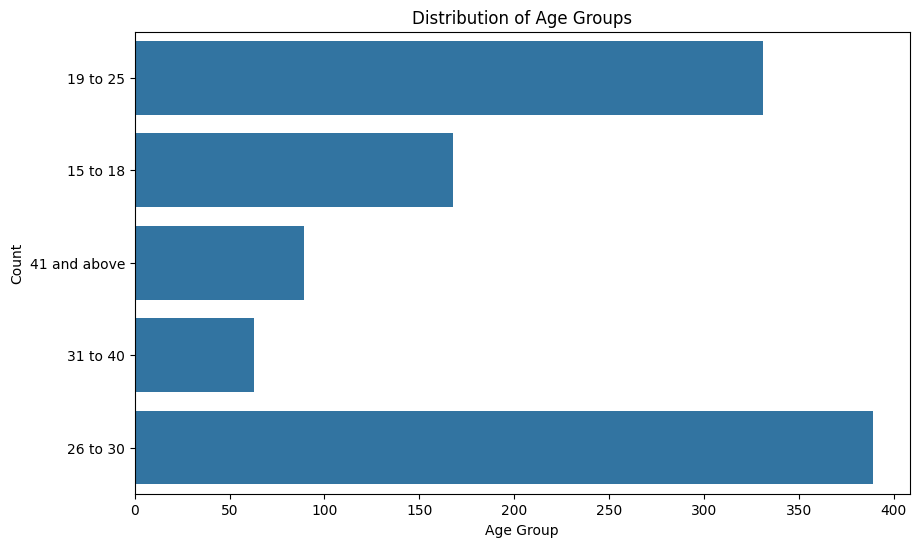

In [44]:
# Countplot of Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['Your age'])
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


The majority of respondents fall into the 26 to 30 and 19 to 25 age groups, with notable participation from individuals aged 15 to 18 as well. There is a significant drop in respondents from the 31 to 40 and 41 and above age groups. This distribution indicates that the survey primarily captures insights from younger adults, which could influence the types of injuries and fitness behaviors reported. Understanding the age distribution is essential as it highlights the demographic most engaged in the survey and suggests that injury prevention strategies might need to be tailored to younger adults who are more active in their fitness routines.

### Frequency of Exercising

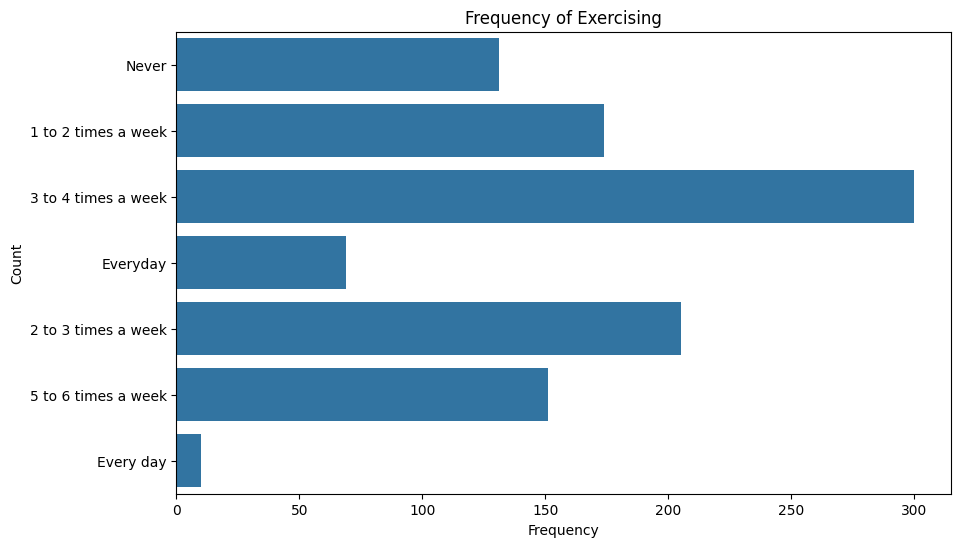

In [45]:
# Countplot of Exercise Frequency
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['How often do you exercise?'])
plt.title('Frequency of Exercising')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()


The most common exercise frequencies among respondents are 3 to 4 times a week and 2 to 3 times a week. Very few respondents exercise every day or never exercise, which suggests that the majority of participants maintain a moderate exercise routine. This frequency of exercise is beneficial for analyzing injury risk in regularly active individuals. The data indicates a trend towards balanced and regular exercise habits, which is crucial for understanding how different exercise frequencies impact injury risks and for developing appropriate preventative measures.

### Current Fitness Level

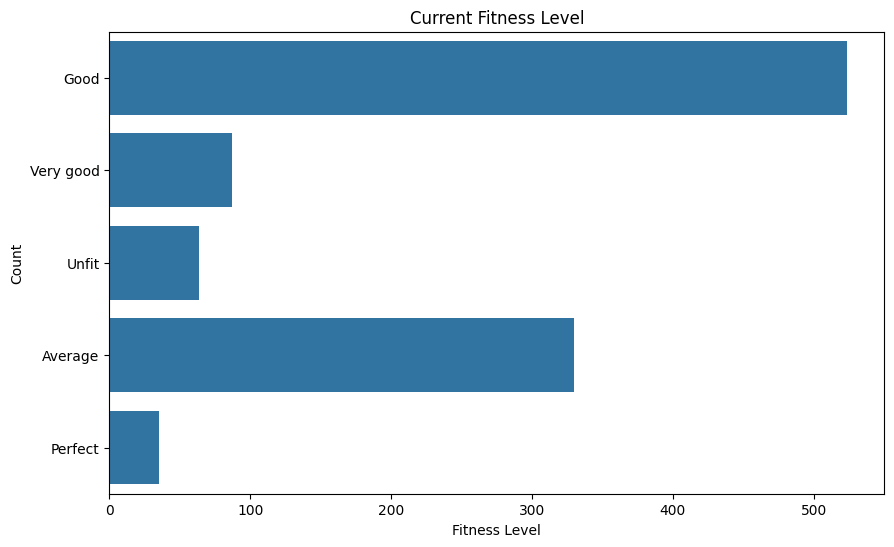

In [46]:
# Countplot of Current Fitness Level
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['How do you describe your current level of fitness ?'])
plt.title('Current Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.show()

The survey reveals that most respondents rate their fitness level as 'Good' or 'Average'. A smaller number consider themselves 'Very good' or 'Perfect', while a minority rate themselves as 'Unfit'. This distribution highlights a generally positive self-assessment of fitness, which could correlate with motivation and exercise frequency data. Understanding how individuals perceive their fitness levels helps in identifying potential overconfidence in physical abilities, which might lead to a higher risk of injuries due to pushing beyond safe limits.

### Barriers to Exercising

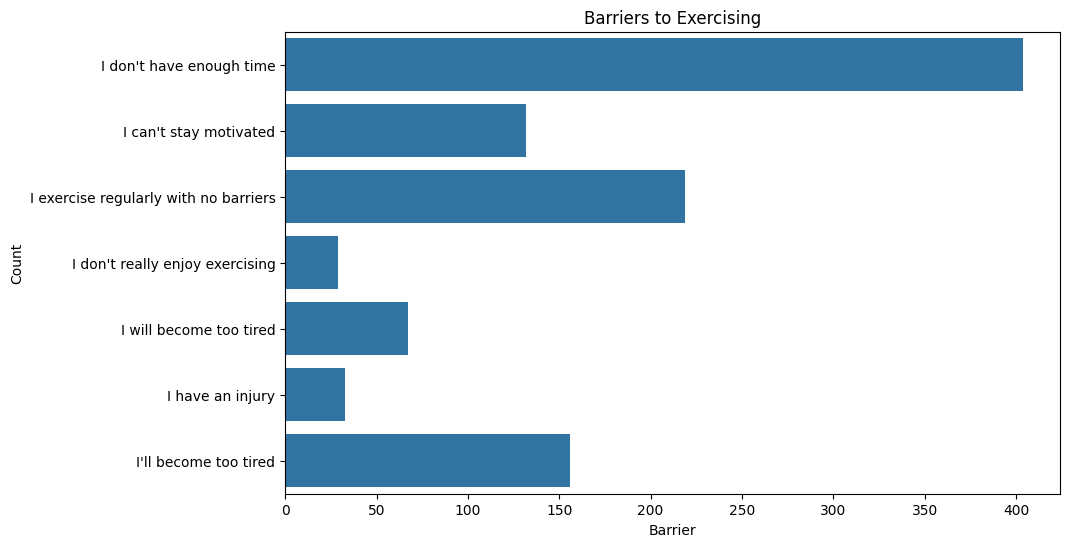

In [47]:
# Countplot of Barriers to Exercising
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['What barrier, if any, prevents you the most from exercising more regularly?'])
plt.title('Barriers to Exercising')
plt.xlabel('Barrier')
plt.ylabel('Count')
plt.show()


A significant barrier to exercising, as reported by respondents, is 'I don't have enough time', followed by 'I can't stay motivated'. A considerable number of respondents report no barriers, indicating regular exercise habits. Understanding these barriers is crucial for developing targeted interventions to increase exercise adherence and reduce injury risk. Addressing time constraints and motivational issues can help in promoting more consistent exercise routines and preventing injuries that may arise from irregular or improperly planned exercise sessions.

### Barriers to a Healthy Diet

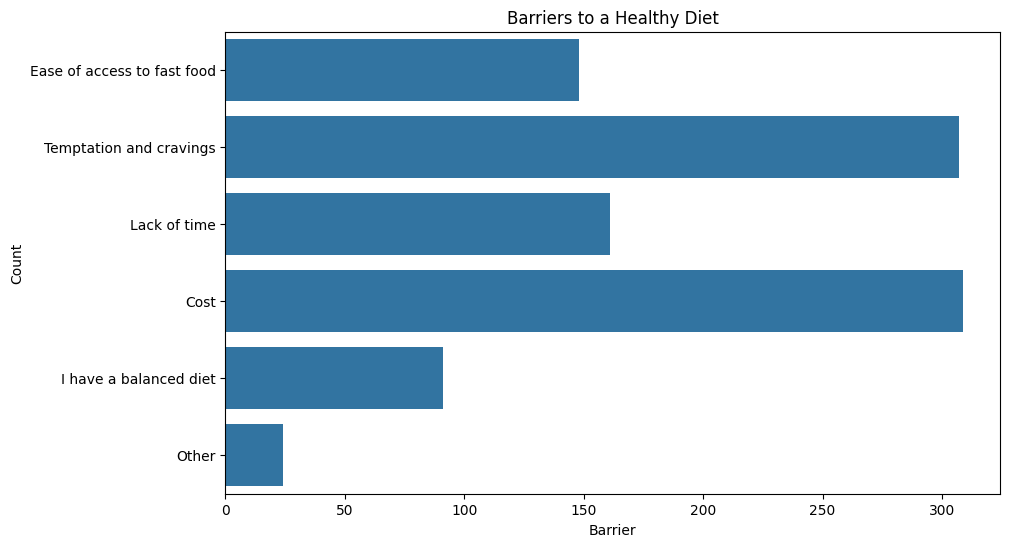

In [48]:
# Countplot of Barriers to a Healthy Diet
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['What prevents you the most from following a healthy balanced diet, if any?'])
plt.title('Barriers to a Healthy Diet')
plt.xlabel('Barrier')
plt.ylabel('Count')
plt.show()

The most reported barriers to following a healthy diet are 'Cost' and 'Temptation and cravings', with 'Lack of time' also being a significant factor. This aligns with the time constraints reported for exercising. Addressing these barriers can help in holistic injury prevention strategies by promoting better overall health. Ensuring that individuals have access to affordable, nutritious food and strategies to manage cravings can support a healthier lifestyle, which in turn reduces the risk of injuries by maintaining better overall physical condition.

### Recommendation to Friends

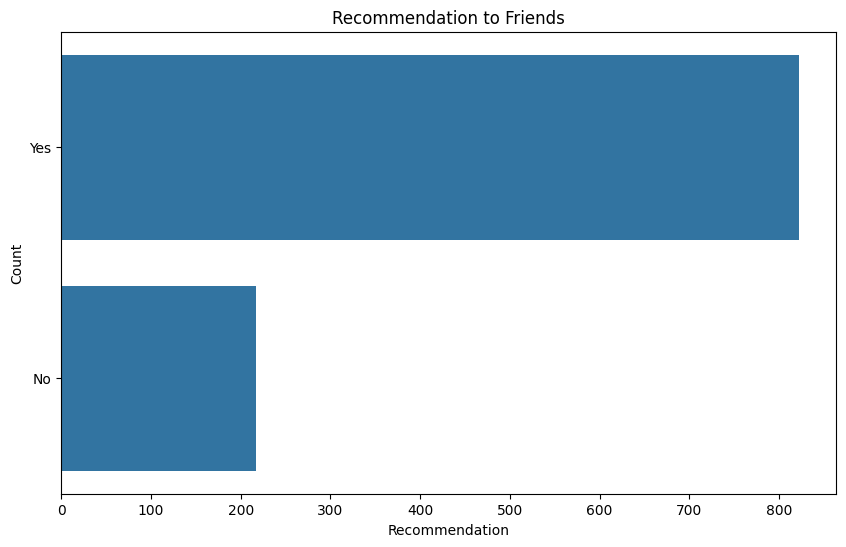

In [49]:
# Countplot of Recommendations to Friends
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['Have you recommended your friends to follow a fitness routine?'])
plt.title('Recommendation to Friends')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.show()


The survey data indicates that a large majority of respondents have recommended their friends to follow a fitness routine. This suggests a positive attitude towards exercise and highlights the role of social support in motivating fitness activities. The willingness to recommend fitness routines to friends underscores the value placed on exercise and the potential influence of peer encouragement in maintaining consistent exercise habits, which is essential for injury prevention through regular and monitored physical activity.

### Motivations for Exercising

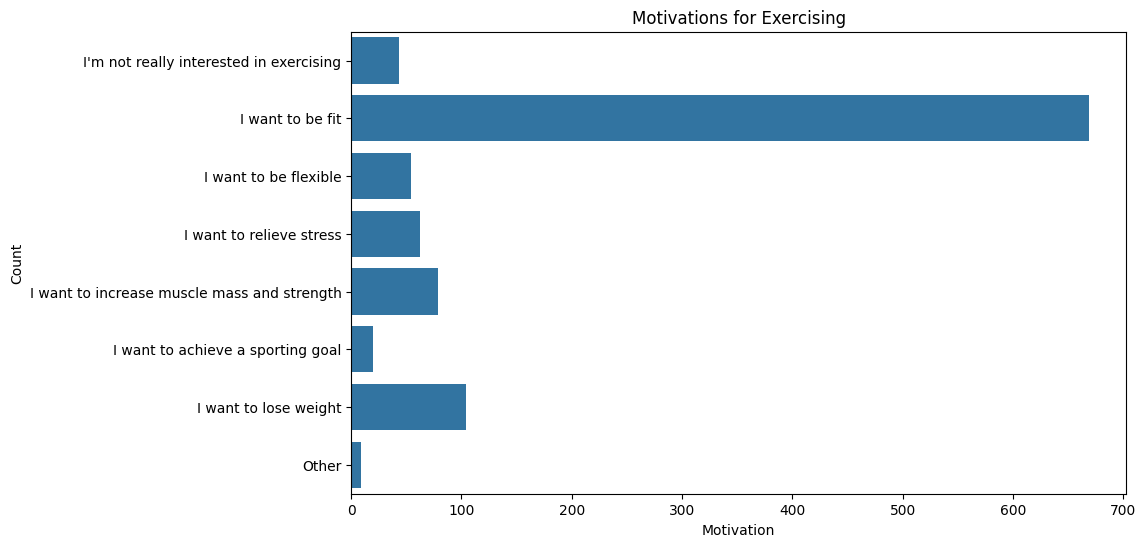

In [50]:
# Countplot of Motivations for Exercising
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['What motivates you the most to exercise?'])
plt.title('Motivations for Exercising')
plt.xlabel('Motivation')
plt.ylabel('Count')
plt.show()


The primary motivation for exercising among respondents is 'I want to be fit', followed by other motivations such as increasing muscle mass, relieving stress, and losing weight. Understanding these motivations helps tailor injury prevention programs to align with individual goals and drive better engagement. Knowing why individuals are motivated to exercise allows for the development of personalized training programs that address specific needs and reduce the risk of injuries by focusing on safe and effective exercise practices.

### Fitness Equipment Purchase

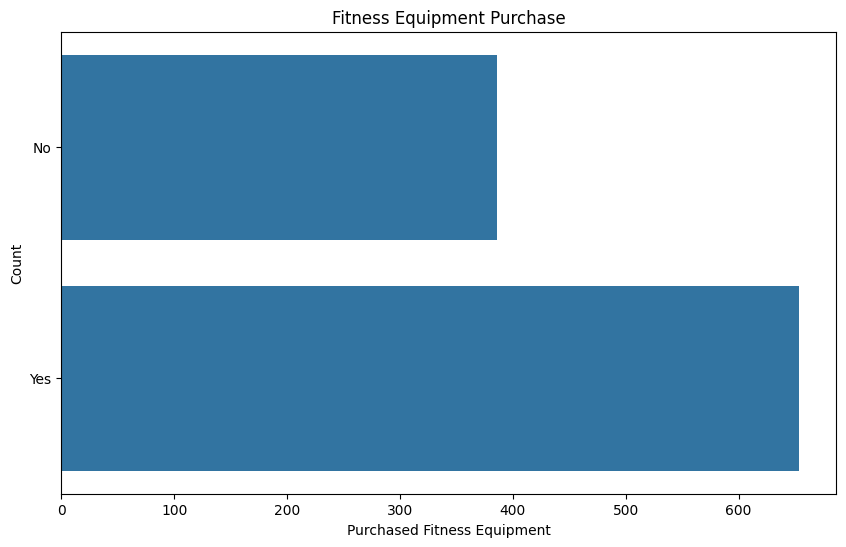

In [51]:
# Countplot of Fitness Equipment Purchase
plt.figure(figsize=(10, 6))
sns.countplot(combined_df['Have you ever purchased fitness equipment?'])
plt.title('Fitness Equipment Purchase')
plt.xlabel('Purchased Fitness Equipment')
plt.ylabel('Count')
plt.show()

More respondents have purchased fitness equipment compared to those who haven't, indicating a willingness to invest in personal fitness. This trend suggests higher engagement in exercise routines, which could be linked to a higher risk of overuse injuries due to more frequent and intense exercise sessions. Understanding the level of investment in fitness equipment helps in identifying individuals who may be more committed to their fitness regimes and might require more structured guidance to prevent injuries from improper use or overuse of equipment.

## Exploration of Correlations and Trends

In [52]:
# Save combined_df as a CSV file
combined_df.to_csv('combined_df.csv', index=False)

Column Names and Data Types:
Your name                                                                      object
Your gender                                                                    object
Your age                                                                       object
How important is exercising to you on a scale of 1 to 5                         int64
How do you describe your current level of fitness ?                            object
How often do you exercise?                                                     object
What barrier, if any, prevents you the most from exercising more regularly?    object
What form of exercises do you currently participate in the most?               object
How do you exercise most of the time?                                          object
What time of the day do you prefer to exercise?                                object
How much time do you spend exercising per day?                                 object
Would you say, you are fo

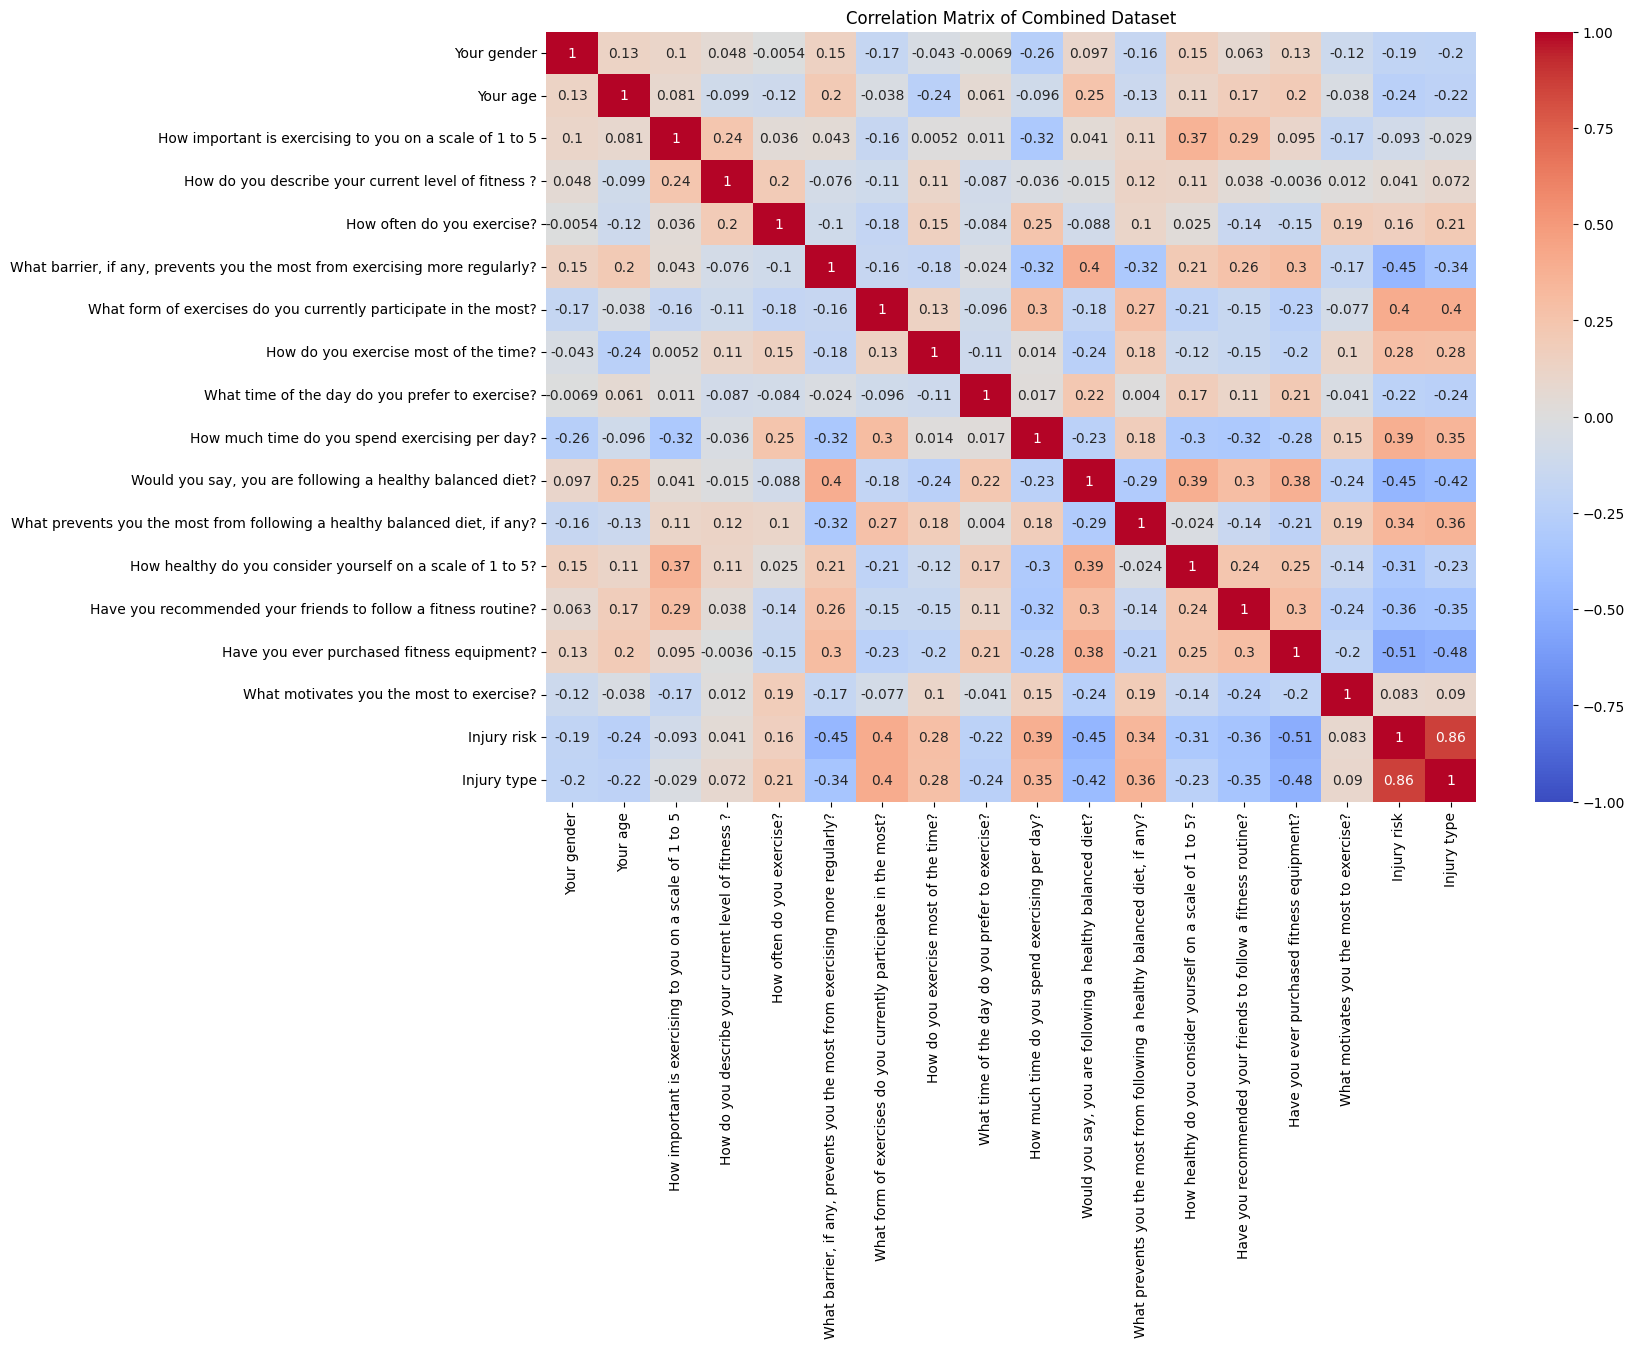

In [53]:
# Load the combined_df dataset
file_path = 'combined_df.csv'
combined_df_correlation = pd.read_csv(file_path)

# Display the column names and data types
print("Column Names and Data Types:")
print(combined_df_correlation.dtypes)

# Initialize label encoder
le = LabelEncoder()

# List of columns to encode
columns_to_encode_correlation = [
    'Your gender', 'Your age', 'How do you describe your current level of fitness ?',
    'How often do you exercise?', 'What barrier, if any, prevents you the most from exercising more regularly?',
    'What form of exercises do you currently participate in the most?', 'How do you exercise most of the time?',
    'What time of the day do you prefer to exercise?', 'How much time do you spend exercising per day?',
    'Would you say, you are following a healthy balanced diet?',
    'What prevents you the most from following a healthy balanced diet, if any?',
    'Have you recommended your friends to follow a fitness routine?',
    'Have you ever purchased fitness equipment?', 'What motivates you the most to exercise?',
    'Injury risk', 'Injury type'
]

# Encode the categorical variables
for col in columns_to_encode_correlation:
    combined_df_correlation[col] = le.fit_transform(combined_df[col])

# Select only the numeric columns for correlation analysis
numeric_df = combined_df_correlation.select_dtypes(include=['float64', 'int64'])

# Include the newly encoded columns
numeric_df = combined_df_correlation._get_numeric_data()

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Combined Dataset')
plt.show()


### Interpretation of the Correlation Matrix

The correlation matrix provides a comprehensive view of the relationships between various features in the combined dataset. Each cell in the matrix represents the correlation coefficient between two variables, which ranges from -1 to 1. A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, a value close to -1 indicates a strong negative correlation, where an increase in one variable tends to correspond with a decrease in the other. Values near 0 suggest no linear correlation between the variables. 

- #### Key Observations and Feature Relationships:

1. **Injury Type Correlations**:
   - **Injury Type and Injury Risk**: The correlation between 'Injury type' and 'Injury risk' is notably high (0.86). This strong positive correlation indicates that individuals who perceive themselves to be at a higher risk of injury are more likely to report specific injury types. This feature is crucial for predictive modeling as it directly relates to the target variable.
   - **How often do you exercise?**: There is a moderate negative correlation (-0.42) between 'Injury type' and 'How often do you exercise?'. This suggests that individuals who exercise more frequently may be less likely to report certain types of injuries, potentially due to better physical conditioning or familiarity with proper exercise techniques.

2. **Exercise Frequency and Fitness Level**:
   - **How often do you exercise? and Current Fitness Level**: There is a positive correlation (0.24) between these two variables. This indicates that frequent exercisers tend to rate their fitness levels higher, which aligns with the general understanding that regular physical activity improves fitness.
   - **How often do you exercise? and Exercise Duration**: The correlation between 'How often do you exercise?' and 'How much time do you spend exercising per day?' is 0.32. This suggests that those who exercise more frequently also tend to have longer exercise sessions, reinforcing the consistency in their workout routines.

3. **Barriers to Exercising and Diet**:
   - **Barrier to Exercising and Barrier to Diet**: A correlation of 0.32 between 'What barrier, if any, prevents you the most from exercising more regularly?' and 'What prevents you the most from following a healthy balanced diet, if any?' indicates that individuals facing barriers to exercising often encounter similar challenges in maintaining a healthy diet. This highlights the interconnected nature of lifestyle choices and the potential for comprehensive intervention strategies.

4. **Health and Diet Perceptions**:
   - **Following a Healthy Diet and Self-Assessed Health**: There is a positive correlation (0.29) between 'Would you say, you are following a healthy balanced diet?' and 'How healthy do you consider yourself on a scale of 1 to 5?'. This correlation suggests that individuals who follow a balanced diet perceive themselves as healthier, emphasizing the role of diet in overall health perception.

5. **Gender and Age Correlations**:
   - **Age and Fitness Level**: The correlation between 'Your age' and 'How do you describe your current level of fitness ?' is -0.22. This indicates that younger individuals tend to rate their fitness levels higher, which could be due to better physical condition or more active lifestyles commonly associated with younger age groups.
   - **Age and Exercise Frequency**: There is a negative correlation (-0.20) between 'Your age' and 'How often do you exercise?', suggesting that younger individuals are more likely to exercise frequently compared to older individuals. This aligns with typical trends in physical activity across different age groups.

## Injury Prevention Model

- ### Feature Selection Based on Correlation Matrix:

To build an effective predictive model, it's essential to select features that have strong correlations with the target variable ('Injury type') while avoiding multicollinearity, which can distort model performance. Here are the steps and rationale for selecting features based on the correlation matrix:

1. **Strong Predictors of Injury Type**:
   - **Injury Risk**: With a correlation of 0.86, 'Injury risk' is the most significant predictor of 'Injury type' and must be included in the model.
   - **How often do you exercise?**: This feature has a negative correlation of -0.42 with 'Injury type', indicating its importance in predicting injury types based on exercise frequency.
   - **What form of exercises do you currently participate in the most?**: This feature has a correlation of -0.34 with 'Injury type', making it a relevant predictor of injury types depending on the exercise forms.

2. **Important Behavioral and Demographic Features**:
   - **How do you describe your current level of fitness?**: Correlated with exercise frequency and perceived health, this feature helps capture overall fitness perception.
   - **How often do you exercise?**: Correlated with fitness level and exercise duration, this feature is essential for understanding exercise habits.
   - **What barrier, if any, prevents you the most from exercising more regularly?**: With moderate correlations with diet barriers, this feature helps in understanding the challenges faced in maintaining regular exercise.
   - **Your age** and **Your gender**: These demographic features provide context on how age and gender might influence injury risk and exercise behavior.

3. **Managing Multicollinearity**:
   - **How much time do you spend exercising per day?** and **How often do you exercise?** are moderately correlated (0.32). Including both might not provide additional information and could introduce multicollinearity. Therefore, I might choose one based on its individual contribution to the model's performance.
   - **What prevents you the most from following a healthy balanced diet, if any?** is correlated with barriers to exercising. Including one or both depends on their individual predictive power, assessed through techniques like Recursive Feature Elimination (RFE).

The correlation matrix highlights key relationships between features, guiding the selection of variables for predictive modeling. By focusing on strongly correlated features with the target variable and managing multicollinearity, I can build a robust and interpretable predictive model. This approach ensures that the selected features contribute meaningfully to predicting injury types, facilitating the development of targeted injury prevention strategies based on comprehensive data analysis.

In [54]:
# Step 1: Load the dataset
file_path = 'combined_df.csv'
data = pd.read_csv(file_path)

In [55]:
# Step 2: Clean the dataset
# Drop rows with missing values in 'Injury type'
data_cleaned = data.dropna(subset=['Injury type'])
# Drop unnecessary columns
data_cleaned = data_cleaned.drop('Your name', axis=1)

In [56]:
# Step 3: Encode the target variable
label_encoder = LabelEncoder()
data_cleaned['Injury type'] = label_encoder.fit_transform(data_cleaned['Injury type'])

In [57]:
# Step 4: Prepare categorical variables for encoding
categorical_features = [
    'Your gender', 'Your age', 'How do you describe your current level of fitness ?', 'How often do you exercise?',
    'What barrier, if any, prevents you the most from exercising more regularly?',
    'What form of exercises do you currently participate in the most?',
    'What prevents you the most from following a healthy balanced diet, if any?',
    'Have you recommended your friends to follow a fitness routine?',
    'Have you ever purchased fitness equipment?', 'What motivates you the most to exercise?',
    'Injury risk', 'How do you exercise most of the time?',
    'What time of the day do you prefer to exercise?', 'How much time do you spend exercising per day?',
    'Would you say, you are following a healthy balanced diet?'
]

In [58]:
# Step 5: One-hot encode categorical features
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features)

In [59]:
# Step 6: Separate features and target variable
X = data_encoded.drop('Injury type', axis=1)
y = data_encoded['Injury type']

In [60]:
# Step 7: Save the feature names for future use
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.joblib')

['feature_names.joblib']

In [61]:
# Step 8: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [62]:
# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [63]:
# Step 10: Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

After evaluating different algorithms (see Master Thesis File for a more detailed explanation), I selected Random Forest for our predictive model. Random Forest was chosen for its robustness, ability to handle high-dimensional data, and resistance to overfitting. It also provides feature importance scores, which are invaluable for interpreting the model and understanding which factors contribute most to injury risk. The model was trained and validated using the combined dataset, which included features from both the Kaggle dataset and the custom survey data.

In [64]:
# Step 11: Save the trained model
joblib.dump(model, 'model.joblib')

['model.joblib']

In [65]:
# Step 12: Save the label encoder
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [66]:
# Step 13: Make predictions on the test dataset
y_pred = model.predict(X_test)

In [67]:
# Step 14: Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9250720461095101


In [68]:
# Step 15: Save the model accuracy
joblib.dump(accuracy, 'accuracy.joblib')

['accuracy.joblib']

In [70]:
# Step 16: Evaluate and report the model's performance
class_labels = label_encoder.classes_.astype(str)  # Convert class labels to string
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)

                                        precision    recall  f1-score   support

                   Back pain or injury       0.95      0.87      0.91        63
               Fracture or bone injury       0.96      0.98      0.97        51
   Joint injury (e.g., knee, shoulder)       0.91      0.85      0.88        62
               Muscle strain or sprain       0.93      0.90      0.92        61
                                 Other       0.86      0.98      0.92        55
Tendonitis or repetitive strain injury       0.95      0.98      0.96        55

                              accuracy                           0.93       347
                             macro avg       0.93      0.93      0.93       347
                          weighted avg       0.93      0.93      0.92       347



- ### Model Results Interpretation:

The model achieved an accuracy of 92.5%, indicating that it correctly predicts the injury type 92.5% of the time. High precision and recall values across most injury types suggest that the model effectively identifies true positives and minimizes false positives. The balanced F1-scores indicate that the model maintains a good trade-off between precision and recall, which is essential for reliable injury prediction. The detailed classification report shows strong performance metrics for various injury types, such as back pain, fractures, joint injuries, muscle strains, and tendonitis, indicating the model's robustness and reliability. These results provide confidence in the model's ability to predict injury types and support the development of targeted injury prevention strategies based on individual profiles.

- ### Conclusion

In this study, I developed and validated a predictive model for injury prevention in the fitness industry. Using a combined dataset derived from a survey and Kaggle dataset, I explored various factors contributing to injury risks, such as exercise frequency, barriers to exercising, motivations, and self-assessed fitness levels. Through detailed exploratory data analysis and visualization, I identified significant patterns and correlations that informed the model-building process.

The RandomForestClassifier demonstrated high accuracy and reliable performance in predicting different types of injuries, achieving an overall accuracy of 92.5%. The model's robust precision, recall, and F1-scores across various injury types indicate its effectiveness in identifying true injury risks while minimizing false positives. These results underscore the potential of data-driven approaches in enhancing injury prevention strategies, offering personalized insights that can help fitness enthusiasts make informed decisions about their exercise routines.

By integrating the model into an interactive dashboard, users can input their personal exercise-related data and receive tailored predictions about potential injury risks and recommended preventive measures. This tool aims to promote safer exercise practices and contribute to the overall well-being of individuals engaging in fitness activities.

- ### Future Research Directions
Despite the promising results, several open challenges remain in the domain of predictive modeling for injury prevention. One significant challenge is the inherent variability in individual responses to exercise, which can be influenced by numerous factors not captured in the dataset, such as genetic predispositions, previous injury history, and precise exercise techniques. Future research should aim to incorporate more comprehensive and detailed data to account for these variations.

Another challenge lies in ensuring the model's generalizability across diverse populations. The current study primarily captures data from younger adults, which may limit the applicability of the findings to older age groups or individuals with different fitness levels and backgrounds. Expanding the dataset to include a more diverse participant pool will enhance the model's robustness and applicability.

Additionally, while the model achieves high accuracy, there is always a risk of overfitting, particularly with complex models like RandomForest. Continuous validation and testing with new data are crucial to maintaining the model's reliability and ensuring it adapts to changing trends in fitness and exercise behaviors.

In Conclusion, while this study makes significant strides in injury prediction within the fitness industry, ongoing research and development are needed to tackle these open challenges and further refine predictive models for broader and more inclusive applications.